<a href="https://colab.research.google.com/github/rohandawar/-daysforcoding/blob/main/plant_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_In this notebook, I am trying to train a CNN model for predicting the plant disease predictions_

In [31]:
# Import Libs

# General
import pandas as pd
import numpy as np
import random
import os
from os import listdir


# PLotting
import matplotlib.pyplot as plt
from matplotlib.image import imread

# cv2
import cv2

# PIL
from PIL import Image

# Sklearn
from sklearn.preprocessing import label_binarize, LabelBinarizer
from sklearn.model_selection import train_test_split

# Keras
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.models import model_from_json
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from keras.utils import to_categorical




In [32]:
# Read the data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
# Check/Locate the data in drive
!ls drive/MyDrive/DataSets/120DaysofCoding/PlantDiseasesPrediction

'Corn_(maize)___Common_rust_'   Potato___Early_blight   Tomato___Bacterial_spot


In [34]:
# # to be deleted
# OneTestImage = 'drive/MyDrive/DataSets/120DaysofCoding/PlantDiseasesPrediction/Potato___Early_blight/b475147c-92bc-419a-b2c3-7d5aabbb79ec___RS_Early.B 7379.JPG'
# # plt.imshow(plt.imread(OneTestImage))
# imread(OneTestImage).shape

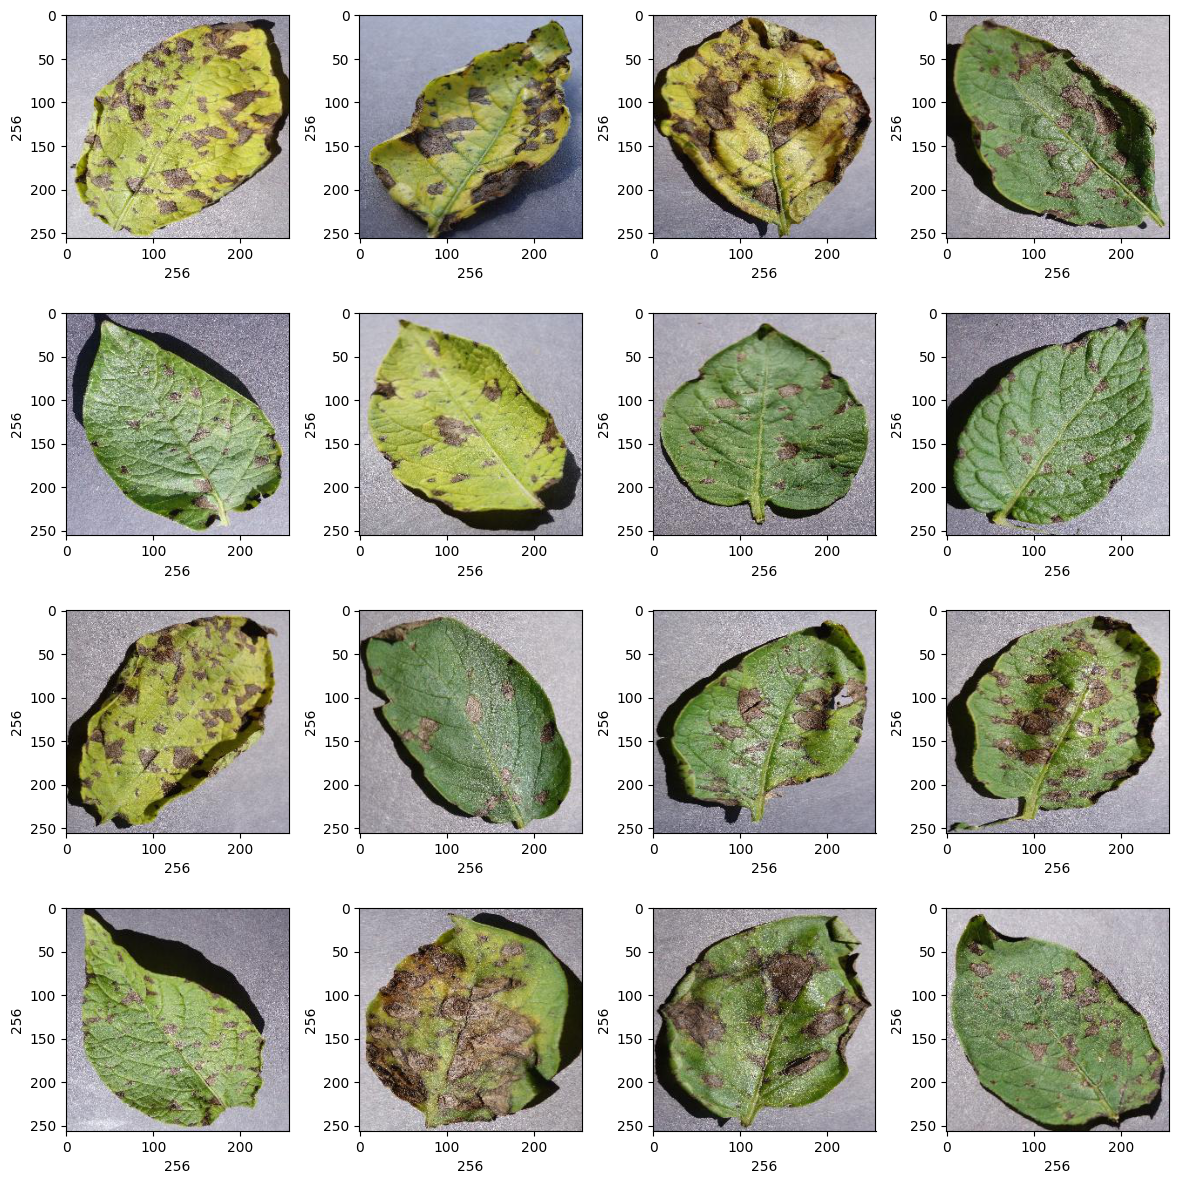

In [35]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = 'drive/MyDrive/DataSets/120DaysofCoding/PlantDiseasesPrediction/Potato___Early_blight'
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  read_img = imread(path + '/' + random.choice(sorted(os.listdir(path))))
  plt.imshow(read_img)
  plt.xlabel(read_img.shape[1], fontsize=10)
  plt.ylabel(read_img.shape[0], fontsize=10)

In [36]:
# Function defination for converting the images into numpy array
def convert_image_to_array(image_dir):
  try:
    image = cv2.imread(image_dir)
    if image is not None:
      image = cv2.resize(image, (256,256))
      return img_to_array(image)
    else:
      return np.array([])
  except Exception as e:
    print(f'Error: {e}')
    return None

In [37]:
# Converting all the images to numpy array
dir = 'drive/MyDrive/DataSets/120DaysofCoding/PlantDiseasesPrediction/'
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot']
binary_lables = [0,1,2]
temp = -1

# reading & converting the images into numpy array
for directory in root_dir:
  plant_image_list = listdir(f'{dir}/{directory}')
  temp +=1
  for files in plant_image_list:
    image_path = f'{dir}/{directory}/{files}'
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_lables[temp])


In [38]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts

0    300
1    300
2    300
dtype: int64

In [39]:
# Check the shape of images
image_list[0].shape

(256, 256, 3)

In [40]:
# Observe the shape of IMage
label_list = np.array(label_list)
label_list.shape

(900,)

In [41]:
# Train & Test split
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state=10)

In [42]:
# Normalize the images
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0

# Reshape
x_train = x_train.reshape(-1, 256,256,3)
x_test = x_test.reshape(-1, 256,256,3)

In [43]:
# One hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [44]:
# Model 

model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3), padding='same', input_shape=(256,256,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 85, 85, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 85, 85, 16)        4624      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 42, 42, 16)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 28224)             0         
                                                                 
 dense_2 (Dense)             (None, 8)                

In [45]:
# Compile the model
model.compile(loss = 'categorical_crossentropy',
                      optimizer=Adam(0.0001),
                      metrics=['accuracy'])

In [46]:
# Spliting the data into train & Validation
x_train, x_val,y_train,y_val = train_test_split(x_train,y_train, test_size=0.2)

In [47]:
# Training the Model
epochs = 50
batch_size = 128
history = model.fit(x_train,
                    y_train, 
                    batch_size=batch_size,
                    epochs = epochs,
                    validation_data = (x_val, y_val))

Epoch 1/50
5/5 [==============================] - 2s 257ms/step - loss: 1.0458 - accuracy: 0.4514 - val_loss: 0.9685 - val_accuracy: 0.5694
Epoch 2/50
5/5 [==============================] - 1s 147ms/step - loss: 0.9163 - accuracy: 0.5608 - val_loss: 0.8512 - val_accuracy: 0.6389
Epoch 3/50
5/5 [==============================] - 1s 148ms/step - loss: 0.7938 - accuracy: 0.6944 - val_loss: 0.7273 - val_accuracy: 0.7917
Epoch 4/50
5/5 [==============================] - 1s 150ms/step - loss: 0.6754 - accuracy: 0.8420 - val_loss: 0.6189 - val_accuracy: 0.8681
Epoch 5/50
5/5 [==============================] - 1s 147ms/step - loss: 0.5655 - accuracy: 0.9062 - val_loss: 0.5136 - val_accuracy: 0.8958
Epoch 6/50
5/5 [==============================] - 1s 141ms/step - loss: 0.4517 - accuracy: 0.9410 - val_loss: 0.4119 - val_accuracy: 0.9097
Epoch 7/50
5/5 [==============================] - 1s 145ms/step - loss: 0.3550 - accuracy: 0.9653 - val_loss: 0.3453 - val_accuracy: 0.9444
Epoch 8/50
5/5 [====

In [48]:
! ls drive/MyDrive/Model/PlantDiseaseDetection

In [49]:
# Save the model
model.save('drive/MyDrive/Model/PlantDiseaseDetection/plant_disease.h5')

# Serialize the model to json
json_model = model.to_json()

# Save the model architecture to JSON file
with open('drive/MyDrive/Model/PlantDiseaseDetection/plant_model.json', 'w') as json_file:
  json_file.write(json_model)

# Save the weights of the model
model.save_weights('drive/MyDrive/Model/PlantDiseaseDetection/plant_model_weights.h5')

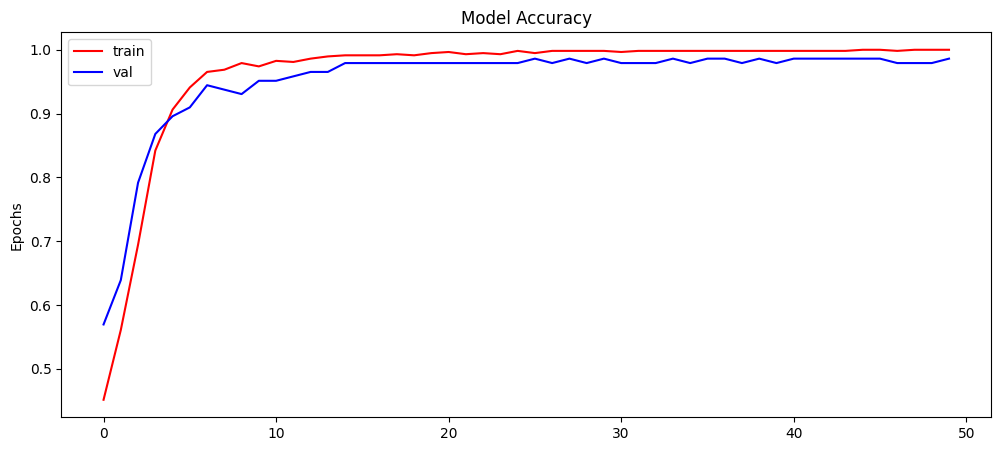

In [50]:
# Plottinh the training history
plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.ylabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

In [51]:
# Model for Training History
print('[INFO] Calculating model accuracy')
scores = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {scores[1]*100}')

[INFO] Calculating model accuracy
6/6 [==============================] - 0s 19ms/step - loss: 0.0454 - accuracy: 0.9833
Test Accuracy: 98.33333492279053


In [52]:
# Creating the y_pred
y_pred = model.predict(x_test)

6/6 [==============================] - 0s 16ms/step


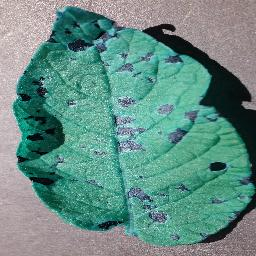

In [53]:
# Plotting image to compare
img = array_to_img(x_test[1])
img

In [54]:
# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",all_labels[np.argmax(y_test[1])])
print("Predicted : ",all_labels[np.argmax(y_pred[1])])

Originally :  Corn-Common_rust
Predicted :  Corn-Common_rust


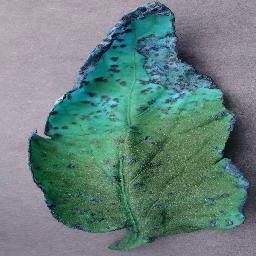

In [55]:
img1 = array_to_img(x_test[15])
img1

In [56]:
# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",all_labels[np.argmax(y_test[15])])
print("Predicted : ",all_labels[np.argmax(y_pred[15])])

Originally :  Tomato-Bacterial_spot
Predicted :  Tomato-Bacterial_spot
